In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [3]:
steps=0
def Bisecion(fun, a, b, error):
    '''
    # 二分法求解函数
    ## 参数说明
    求解函数f(x)==0```fun```，求解区间```[a,b]```，求解误差```error```
    ## 举例
    >>> import numpy as np
    >>> Bisecion(np.sin, 3, 4 ,10e-8)
    3.1415926590561867
    >>> def f(x):\n
            return x**2-2
    >>> Bisecion(f ,1 ,2 ,10e-8)
    1.4142135605216026
    '''
    global steps
    steps=0
    while (b-a)/2 > error:
        c = (b+a)/2
        if fun(c) == 0:
            return c
        elif fun(a)*fun(c) > 0:
            a = c
        else:
            b = c
        steps+=1
    return (b+a)/2

In [4]:
steps=0
s=0
def FPI(fun,x0,errorArg):
    '''
    # 不动点迭代法求解函数
    ## 参数说明
    输入函数g(x)==x```fun```，求解起点```x0```，求解误差```errorArg```
    ## 举例
    >>> import numpy as np
    >>> Bisecion(np.cos, 1 ,1e-8)
    0.7390851300853067
    >>> def f(x):\n
            return (1+2*x**3)/(1+3*x**2)
    >>> Bisecion(f ,1 ,1e-8)
    0.6823278038280193
    '''
    global steps
    global s
    steps=0
    error=1
    while error>errorArg:
        x=fun(x0)
        error=np.abs(x-x0)
        x0=x
        steps+=1
    s=np.abs(fun(x0)-x0)/error
    return x0

In [54]:
steps=0
s=0
def SM(fun,x0,x1,errorArg=1e-6,procedure=False):
    '''
    # 割线方法
    ## 参数说明
        `fun`：需要求解的方程fun(x)==0
        `x0`、`x1`：求解初始值
        `errorArg`：求解精度，默认为1e-6
    '''
    global steps
    global s
    steps=0
    error=1
    error0=1
    print('       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)')
    while error>errorArg:
        x=x1-fun(x1)*(x1-x0)/(fun(x1)-fun(x0))
        error=np.abs(x-x0)
        if procedure==True:
            print('%16.8e%16.8e%16.8e%16.8e%16.8e'%(x0,x1,x,error,error0))
        x0=x1
        x1=x
        error0=error
        steps+=1
    return x

In [26]:
steps=0
s=0
def RF(fun,x0,x1,errorArg=1e-6,procedure=False):
    '''
    # 试位方法
    ## 参数说明
        `fun`：需要求解的方程fun(x)==0
        `x0`、`x1`：求解初始值
        `errorArg`：求解精度，默认为1e-6
    '''
    global steps
    global s
    steps=0
    error=1
    error0=1
    print('       x(i)           x(i+1)          x(i+2)           e(i)')
    while error>errorArg:
        x=x1-fun(x1)*(x1-x0)/(fun(x1)-fun(x0))
        error=np.abs(x-x0)
        if procedure==True:
            print('%16.8e%16.8e%16.8e%16.8e'%(x0,x1,x,error))
        if f(x0)*f(x)<0:
            x1=x
        else:
            x0=x
        steps+=1
    return x

In [34]:
steps=0
s=0
def IQI(fun,x0,x1,x2,errorArg=1e-6,procedure=False):
    '''
    # 逆二次插值方法
    ## 参数说明
        `fun`：需要求解的方程fun(x)==0
        `x0`、`x1`、`x2`：求解初始值
        `errorArg`：求解精度，默认为1e-6
    '''
    global steps
    global s
    steps=0
    error=1
    error0=1
    print('       x(i)           x(i+1)          x(i+2)          x(i+3)           e(i)')
    while error>errorArg:
        q=f(x0)/f(x1)
        r=f(x2)/f(x1)
        s=f(x2)/f(x0)
        x=x2-(r*(r-q)*(x2-x1)+(1-r)*s*(x2-x0))/((q-1)*(r-1)*(s-1))
        error=np.abs(x-x0)
        if procedure==True:
            print('%16.8e%16.8e%16.8e%16.8e%16.8e'%(x0,x1,x2,x,error))
        x0=x1
        x1=x2
        x2=x
        steps+=1
    return x

## 习题 1.5-7

（A）二分法

In [30]:
def f(x):
    return x**4-2
print('r=%.6f'%Bisecion(f,1,2,1e-6),'steps=%d'%steps)

r=1.189208 steps=19


（B）割线法

In [31]:
print('r=%.6f'%SM(f,1,2,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)
  1.00000000e+00  2.00000000e+00  1.06666667e+00  6.66666667e-02
  2.00000000e+00  1.06666667e+00  1.11144125e+00  8.88558748e-01
  1.06666667e+00  1.11144125e+00  1.20315068e+00  1.36484015e-01
  1.11144125e+00  1.20315068e+00  1.18777755e+00  7.63362948e-02
  1.20315068e+00  1.18777755e+00  1.18918219e+00  1.39684894e-02
  1.18777755e+00  1.18918219e+00  1.18920716e+00  1.42961348e-03
  1.18918219e+00  1.18920716e+00  1.18920712e+00  2.49231269e-05
  1.18920716e+00  1.18920712e+00  1.18920712e+00  4.49866839e-08
r=1.189207 steps=8


In [13]:
def g1(x):
    return x/2+1/x**3
print('r=%.6f'%FPI(g1,2,1e-4),'steps=%d'%steps)

r=1.189257 steps=70710628


In [15]:
def g2(x):
    return x/3+1/(3*x**3)
print('r=%.6f'%FPI(g2,2,1e-2),'steps=%d'%steps)

KeyboardInterrupt: 

## 编程 1.5-1(a)

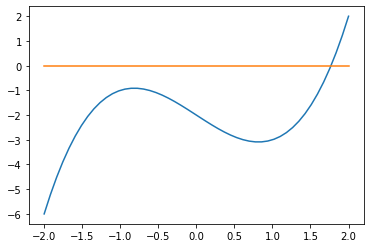

In [40]:
def f(x):
    return x**3-2*x-2

x=np.linspace(-2,2)
plt.plot(x,f(x))
plt.plot(x,0*x)

In [32]:
print('r=%.6f'%SM(f,1,2,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)
  1.00000000e+00  2.00000000e+00  1.60000000e+00  6.00000000e-01
  2.00000000e+00  1.60000000e+00  1.74226804e+00  2.57731959e-01
  1.60000000e+00  1.74226804e+00  1.77295599e+00  1.72955988e-01
  1.74226804e+00  1.77295599e+00  1.76922037e+00  2.69523239e-02
  1.77295599e+00  1.76922037e+00  1.76929217e+00  3.66382263e-03
  1.76922037e+00  1.76929217e+00  1.76929235e+00  7.19891288e-05
  1.76929217e+00  1.76929235e+00  1.76929235e+00  1.89042681e-07
r=1.769292 steps=7


## 编程 1.5-2(a)

In [33]:
print('r=%.6f'%RF(f,1,2,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)
  1.00000000e+00  2.00000000e+00  1.60000000e+00  6.00000000e-01
  1.60000000e+00  2.00000000e+00  1.74226804e+00  1.42268041e-01
  1.74226804e+00  2.00000000e+00  1.76525915e+00  2.29911118e-02
  1.76525915e+00  2.00000000e+00  1.76869677e+00  3.43761313e-03
  1.76869677e+00  2.00000000e+00  1.76920454e+00  5.07775406e-04
  1.76920454e+00  2.00000000e+00  1.76927941e+00  7.48687341e-05
  1.76927941e+00  2.00000000e+00  1.76929045e+00  1.10360416e-05
  1.76929045e+00  2.00000000e+00  1.76929207e+00  1.62670599e-06
  1.76929207e+00  2.00000000e+00  1.76929231e+00  2.39774108e-07
r=1.769292 steps=9


## 编程 1.5-3(a)

In [36]:
print('r=%.6f'%IQI(f,1,2,0,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)          x(i+3)           e(i)
  1.00000000e+00  2.00000000e+00  0.00000000e+00 -2.00000000e-01  1.20000000e+00
  2.00000000e+00  0.00000000e+00 -2.00000000e-01 -1.19960179e-01  2.11996018e+00
  0.00000000e+00 -2.00000000e-01 -1.19960179e-01 -1.15800077e+00  1.15800077e+00
 -2.00000000e-01 -1.19960179e-01 -1.15800077e+00 -1.21572813e+01  1.19572813e+01
 -1.19960179e-01 -1.15800077e+00 -1.21572813e+01 -3.60608853e+00  3.48612835e+00
 -1.15800077e+00 -1.21572813e+01 -3.60608853e+00 -1.08151854e+00  7.64822313e-02
 -1.21572813e+01 -3.60608853e+00 -1.08151854e+00 -1.01147565e+00  1.11458056e+01
 -3.60608853e+00 -1.08151854e+00 -1.01147565e+00 -2.05460434e-01  3.40062809e+00
 -1.08151854e+00 -1.01147565e+00 -2.05460434e-01  4.61738533e+00  5.69890387e+00
 -1.01147565e+00 -2.05460434e-01  4.61738533e+00 -2.37733581e+00  1.36586016e+00
 -2.05460434e-01  4.61738533e+00 -2.37733581e+00  1.44342373e-01  3.49802806e-01
  4.61738533e+00 -2.37733581e+00 

## 编程 1.5-4

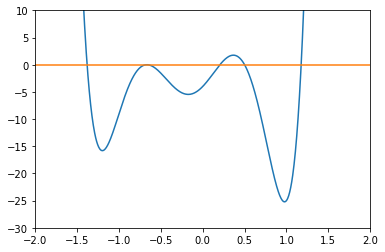

In [49]:
def f(x):
    return 54*x**6+45*x**5-102*x**4-69*x**3+35*x**2+16*x-4

x=np.linspace(-2,2,1000)
plt.axis([-2,2,-30,10])
plt.plot(x,f(x))
plt.plot(x,x*0)

In [58]:
print('r=%.6f'%SM(f,-2,-1.5,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)
 -2.00000000e+00 -1.50000000e+00 -1.47967480e+00  5.20325203e-01  1.00000000e+00
 -1.50000000e+00 -1.47967480e+00 -1.41326903e+00  8.67309675e-02  5.20325203e-01
 -1.47967480e+00 -1.41326903e+00 -1.39136132e+00  8.83134766e-02  8.67309675e-02
 -1.41326903e+00 -1.39136132e+00 -1.38255404e+00  3.07149912e-02  8.83134766e-02
 -1.39136132e+00 -1.38255404e+00 -1.38135181e+00  1.00095071e-02  3.07149912e-02
 -1.38255404e+00 -1.38135181e+00 -1.38129877e+00  1.25526890e-03  1.00095071e-02
 -1.38135181e+00 -1.38129877e+00 -1.38129848e+00  5.33309442e-05  1.25526890e-03
 -1.38129877e+00 -1.38129848e+00 -1.38129848e+00  2.90345188e-07  5.33309442e-05
r=-1.381298 steps=8


此根为超线性收敛

In [60]:
print('r=%.6f'%SM(f,-1,-0.5,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)
 -1.00000000e+00 -5.00000000e-01 -3.94957983e-01  6.05042017e-01  1.00000000e+00
 -5.00000000e-01 -3.94957983e-01 -5.93492184e-01  9.34921838e-02  6.05042017e-01
 -3.94957983e-01 -5.93492184e-01 -6.17056873e-01  2.22098889e-01  9.34921838e-02
 -5.93492184e-01 -6.17056873e-01 -6.38392849e-01  4.49006650e-02  2.22098889e-01
 -6.17056873e-01 -6.38392849e-01 -6.49095462e-01  3.20385896e-02  4.49006650e-02
 -6.38392849e-01 -6.49095462e-01 -6.55978596e-01  1.75857472e-02  3.20385896e-02
 -6.49095462e-01 -6.55978596e-01 -6.60074827e-01  1.09793649e-02  1.75857472e-02
 -6.55978596e-01 -6.60074827e-01 -6.62609243e-01  6.63064736e-03  1.09793649e-02
 -6.60074827e-01 -6.62609243e-01 -6.64162549e-01  4.08772203e-03  6.63064736e-03
 -6.62609243e-01 -6.64162549e-01 -6.65121000e-01  2.51175690e-03  4.08772203e-03
 -6.64162549e-01 -6.65121000e-01 -6.65711987e-01  1.54943755e-03  2.51175690e-03
 -6.65121000e-01 -6.65711987e-

此根为线性收敛，二重根

In [63]:
print('r=%.6f'%SM(f,0,0.2,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)
  0.00000000e+00  2.00000000e-01  2.04988603e-01  2.04988603e-01  1.00000000e+00
  2.00000000e-01  2.04988603e-01  2.05181464e-01  5.18146401e-03  2.04988603e-01
  2.04988603e-01  2.05181464e-01  2.05182924e-01  1.94321631e-04  5.18146401e-03
  2.05181464e-01  2.05182924e-01  2.05182925e-01  1.46067777e-06  1.94321631e-04
  2.05182924e-01  2.05182925e-01  2.05182925e-01  4.24578317e-10  1.46067777e-06
r=0.205183 steps=5


此根为超线性收敛

In [64]:
print('r=%.6f'%SM(f,0.4,0.6,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)
  4.00000000e-01  6.00000000e-01  4.59531457e-01  5.95314569e-02  1.00000000e+00
  6.00000000e-01  4.59531457e-01  4.86550990e-01  1.13449010e-01  5.95314569e-02
  4.59531457e-01  4.86550990e-01  5.02859623e-01  4.33281666e-02  1.13449010e-01
  4.86550990e-01  5.02859623e-01  4.99833158e-01  1.32821688e-02  4.33281666e-02
  5.02859623e-01  4.99833158e-01  4.99998037e-01  2.86158675e-03  1.32821688e-02
  4.99833158e-01  4.99998037e-01  5.00000001e-01  1.66843091e-04  2.86158675e-03
  4.99998037e-01  5.00000001e-01  5.00000000e-01  1.96330904e-06  1.66843091e-04
  5.00000001e-01  5.00000000e-01  5.00000000e-01  1.36314715e-09  1.96330904e-06
r=0.500000 steps=8


此根为超线性收敛

In [65]:
print('r=%.6f'%SM(f,1,1.5,procedure=True),'steps=%d'%steps)

       x(i)           x(i+1)          x(i+2)           e(i)        e(i)/e(i-1)
  1.00000000e+00  1.50000000e+00  1.03772873e+00  3.77287304e-02  1.00000000e+00
  1.50000000e+00  1.03772873e+00  1.07067899e+00  4.29321015e-01  3.77287304e-02
  1.03772873e+00  1.07067899e+00  1.32499770e+00  2.87268966e-01  4.29321015e-01
  1.07067899e+00  1.32499770e+00  1.12332208e+00  5.26430962e-02  2.87268966e-01
  1.32499770e+00  1.12332208e+00  1.15176783e+00  1.73229863e-01  5.26430962e-02
  1.12332208e+00  1.15176783e+00  1.18245228e+00  5.91301946e-02  1.73229863e-01
  1.15176783e+00  1.18245228e+00  1.17547255e+00  2.37047147e-02  5.91301946e-02
  1.18245228e+00  1.17547255e+00  1.17609955e+00  6.35272876e-03  2.37047147e-02
  1.17547255e+00  1.17609955e+00  1.17611560e+00  6.43050011e-04  6.35272876e-03
  1.17609955e+00  1.17611560e+00  1.17611556e+00  1.60101990e-05  6.43050011e-04
  1.17611560e+00  1.17611556e+00  1.17611556e+00  4.10950862e-08  1.60101990e-05
r=1.176116 steps=11


此根为超线性收敛